# ML roadmap

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [17]:
sns.set()
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


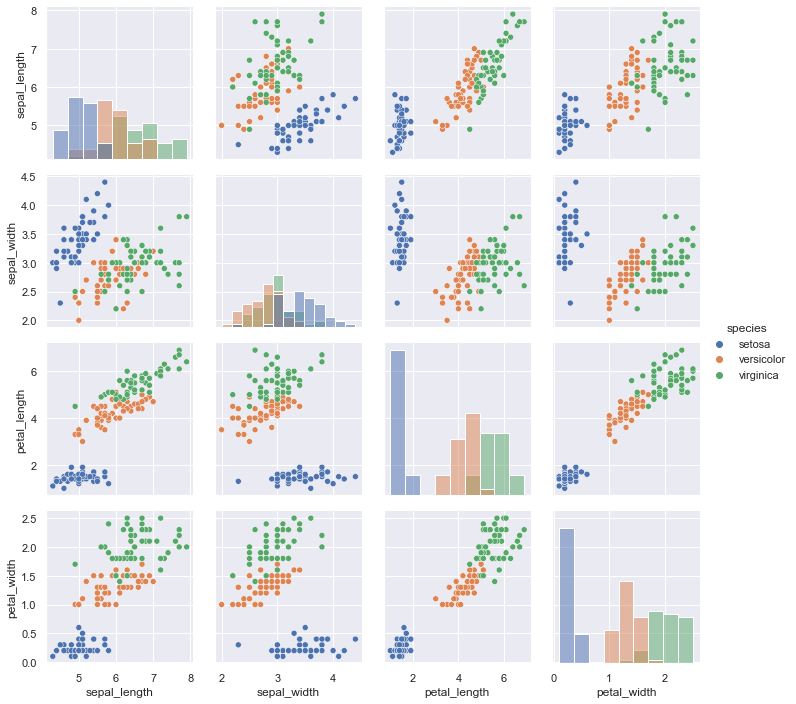

In [32]:
 
g = sns.PairGrid(iris, hue='species');

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [33]:
X_iris = iris.drop('species',axis=1)
Y_iris = iris['species']

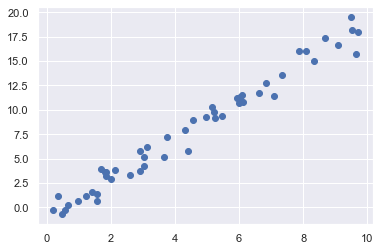

In [104]:
rng = np.random.RandomState(42) 
x = 10 * rng.rand(50) 
y=2*x-1+rng.randn(50) 
plt.scatter(x, y);


In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
model.fit(X, y)

X.shape

(50, 1)

ValueError: x and y must be the same size

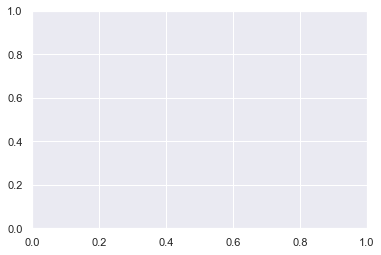

In [118]:
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);


In [37]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, Y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [38]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)


0.9736842105263158

/Users/sarabheshwarank/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


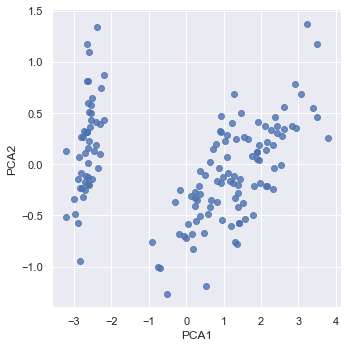

In [39]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",  data=iris, fit_reg=False);

/Users/sarabheshwarank/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


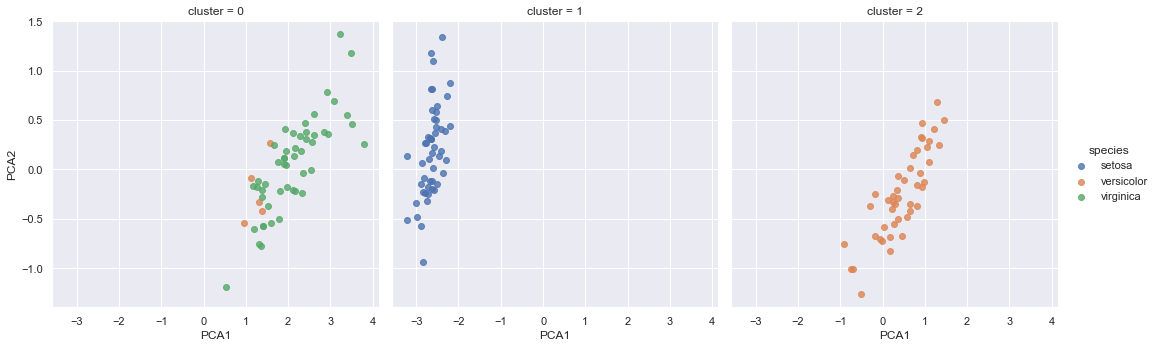

In [40]:
from sklearn.mixture import GaussianMixture as GMM 
model = GMM(n_components=3, covariance_type='full') 
model.fit(X_iris) 
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
               col='cluster', fit_reg=False);

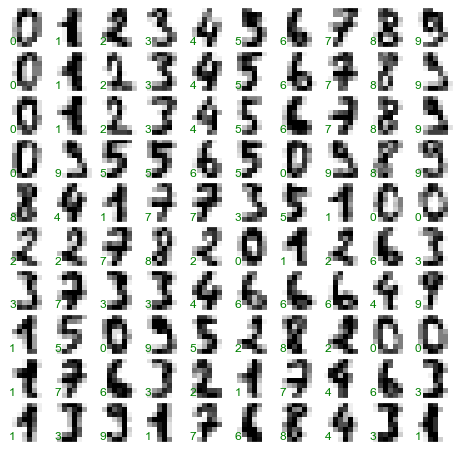

In [41]:
from sklearn.datasets import load_digits 
digits = load_digits()
            


fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(digits.target[i]),
                        transform=ax.transAxes, color='green')
    
X=digits.data
y=digits.target

No handles with labels found to put in legend.


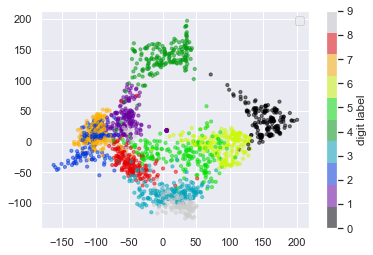

In [117]:
from sklearn.manifold import Isomap 
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape


plt.scatter(data_projected[:,0],data_projected[:,1],s=10,c=digits.target,edgecolor=None,alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))


In [101]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


(1347, 64)

In [45]:
accuracy_score(ytest,y_model)

0.8333333333333334

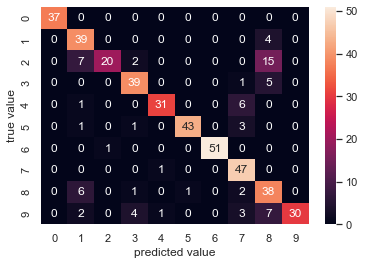

In [64]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat,annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

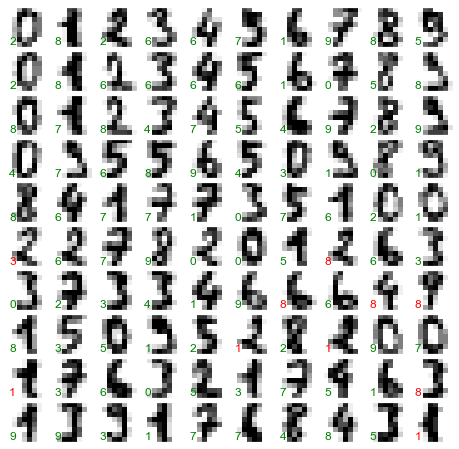

In [74]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                     subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')


In [33]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed) 
    X = rng.rand(N, 1) ** 2 
    y=10-1./(X.ravel()+0.1) 
    if err>0:
        y += err * rng.randn(N) 
    return X, y
X, y = make_data(40)

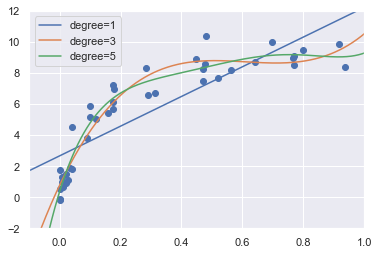

In [131]:
 
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X, y) 
axis = plt.axis()
for degree in [1, 3, 5]:
        y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
        plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


/Users/sarabheshwarank/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


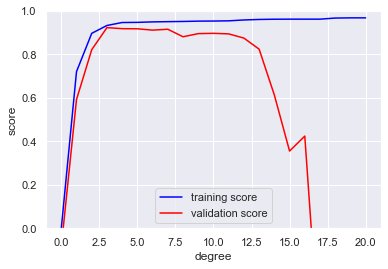

In [134]:
from sklearn.model_selection  import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                              'polynomialfeatures__degree',
                                              degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

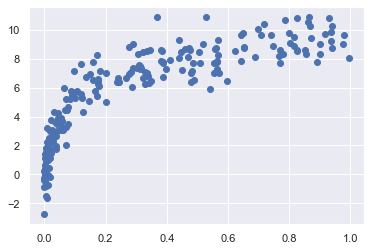

In [135]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

/Users/sarabheshwarank/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


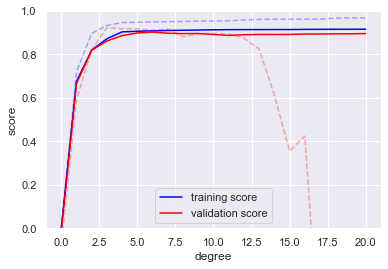

In [137]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                                'polynomialfeatures__degree',
                                                degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
             label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
             linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
             linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

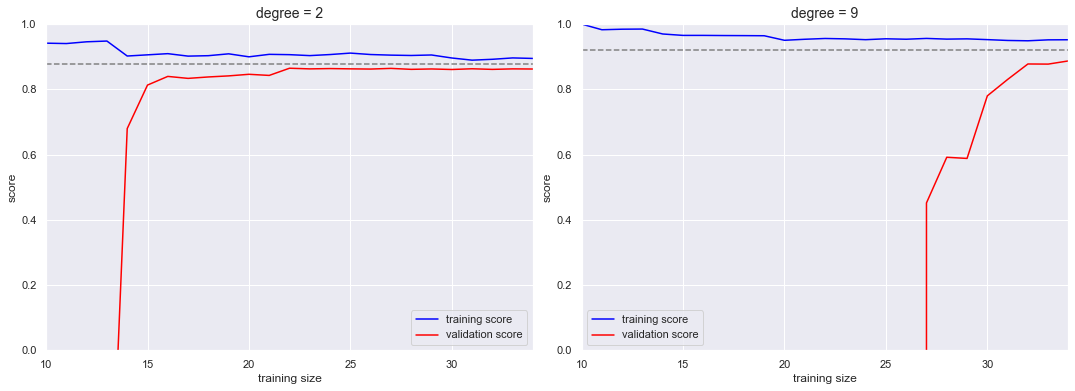

In [139]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                             X, y, cv=7,
                                             train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                     linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
                          'linearregression__fit_intercept': [True, False],
                          'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X, y);

In [142]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

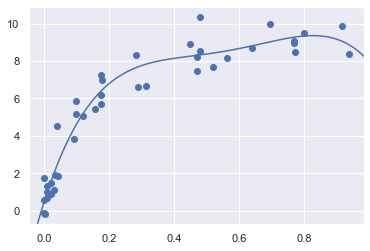

In [144]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# Gausian Naive Bayes

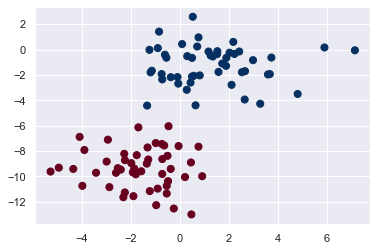

In [159]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [162]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

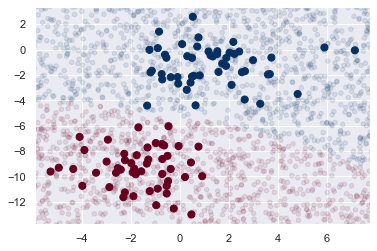

In [165]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [170]:
yprob = model.predict_proba(Xnew)
yprob.round(3)

array([[0.   , 1.   ],
       [0.001, 0.999],
       [0.   , 1.   ],
       ...,
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.153, 0.847]])

In [3]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ['alt.atheism','rec.motorcycles','sci.crypt',
 'sci.electronics','soc.religion.christian']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

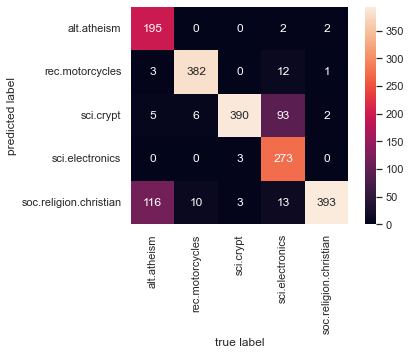

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', 
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [19]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [25]:
predict_category('')

'sci.electronics'

In [47]:
model = LinearRegression(fit_intercept=True)

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y) 



LinearRegression()

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)

class GaussianFeatures(BaseEstimator, TransformerMixin):

    

    def __init__(self, N, width_factor=2.0): 
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None): 
        arg=(x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
         # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0]) 
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)


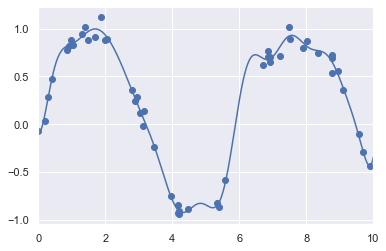

In [55]:
gauss_model = make_pipeline(GaussianFeatures(20),
                                LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [56]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
                           model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
                          ylabel='coefficient',xlim=(0, 10))

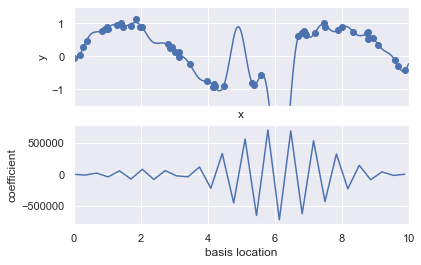

In [57]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

basis_plot(model)

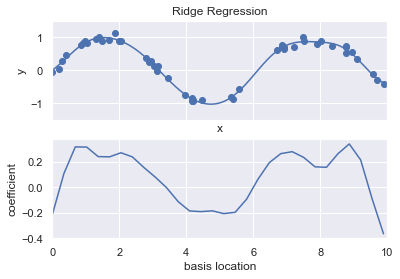

In [58]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1)) 
basis_plot(model, title='Ridge Regression')

/Users/sarabheshwarank/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704831154, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


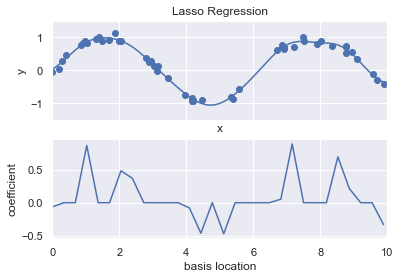

In [59]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001)) 
basis_plot(model, title='Lasso Regression')

In [60]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True) 
weather = pd.read_csv('1404899.csv', index_col='DATE', parse_dates=True)

In [70]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [72]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [73]:
daily

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
...,...
2018-06-26,4771.0
2018-06-27,4942.0
2018-06-28,4387.0


In [74]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [75]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2018-06-26,4771.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-06-27,4942.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-06-28,4387.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
